<a href="https://colab.research.google.com/github/Mohamed-Nawfal/Telecom-Customer-Churn-Prediction/blob/main/Telecom_CustumerChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
customer_churn = pd.read_csv('Telcom Data.csv')
customer_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Data Cleaning
#check duplicates data
customer_churn.duplicated().sum()

np.int64(0)

In [5]:
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
customer_churn['Churn'].value_counts(normalize=True)

,proportion
Churn,
No,0.73463
Yes,0.26537


In [7]:
customer_churn['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [8]:
customer_churn['Churn'] = customer_churn['Churn'].replace({'Yes':1, 'No':0})

In [9]:
customer_churn['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [10]:
customer_churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
customer_churn['gender'].value_counts()

,count
gender,
Male,3555
Female,3488


In [12]:
customer_churn['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5901
1,1142


In [13]:
customer_churn['MultipleLines'].value_counts()

,count
MultipleLines,
No,3390
Yes,2971
No phone service,682


In [14]:
customer_churn['InternetService'].value_counts()

,count
InternetService,
Fiber optic,3096
DSL,2421
No,1526


In [15]:
customer_churn['OnlineSecurity'].value_counts()

,count
OnlineSecurity,
No,3498
Yes,2019
No internet service,1526


In [16]:
customer_churn['StreamingTV'].value_counts()

,count
StreamingTV,
No,2810
Yes,2707
No internet service,1526


In [17]:
for i in customer_churn.columns:
    print("******************************",i,"********************************************")
    print()
    print(set(customer_churn[i].tolist()))
    print()

****************************** customerID ********************************************

{'8263-OKETD', '5734-EJKXG', '5955-EPOAZ', '2003-CKLOR', '3717-LNXKW', '4670-TABXH', '0326-VDYXE', '0128-MKWSG', '6656-GULJQ', '3714-XPXBW', '5084-OOVCJ', '5334-AFQJB', '2252-ISRNH', '4778-IZARL', '4311-QTTAI', '3941-XTSKM', '9571-EDEBV', '8627-EHGIP', '5110-CHOPY', '3588-WSTTJ', '8547-NSBBO', '7269-JISCY', '6177-PEVRA', '1342-JPNKI', '5572-ZDXHY', '5176-LDKUH', '8612-GXIDD', '8182-BJDSI', '2697-NQBPF', '4223-BKEOR', '8878-HMWBV', '3481-JHUZH', '4581-SSPWD', '2840-XANRC', '2900-PHPLN', '2273-QCKXA', '1135-HIORI', '5996-DAOQL', '6907-FLBER', '7839-NUIAA', '4554-YGZIH', '2181-TIDSV', '8260-NGFNY', '8845-LWKGE', '2228-BZDEE', '9518-XXBXE', '8745-PVESG', '8405-IGQFX', '5339-TJFEK', '8746-OQQRW', '6546-OPBBH', '5966-EMAZU', '3389-YGYAI', '2418-TPEUN', '1447-PJGGA', '9092-GDZKO', '0096-BXERS', '6379-RXJRQ', '2919-HBCJO', '6429-SHBCB', '9237-HQITU', '4939-KYYPY', '5159-YFPKQ', '0225-ZORZP', '0650-BWOZN', '

In [18]:
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].replace(" ", np.nan)


In [19]:
customer_churn['TotalCharges'].isnull().sum()

np.int64(11)

In [20]:
customer_churn['TotalCharges'].mode()

,TotalCharges
0,20.2


In [21]:
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].fillna('20.2')

In [22]:
customer_churn['TotalCharges'].isnull().sum()

np.int64(0)

In [23]:
customer_churn['TotalCharges'] = customer_churn['TotalCharges'].astype(float)

In [24]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
customer_churn = customer_churn.drop('customerID', axis=1)

In [26]:
customer_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [27]:
customer_churn = pd.get_dummies(customer_churn, columns=['gender','Partner','Dependents',
                                                        'PhoneService','MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod'], drop_first=True)

In [28]:
customer_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   Churn                                  7043 non-null   int64  
 5   gender_Male                            7043 non-null   bool   
 6   Partner_Yes                            7043 non-null   bool   
 7   Dependents_Yes                         7043 non-null   bool   
 8   PhoneService_Yes                       7043 non-null   bool   
 9   MultipleLines_No phone service         7043 non-null   bool   
 10  MultipleLines_Yes                      7043 non-null   bool   
 11  Inte

In [29]:
customer_churn.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,...,False,False,False,False,False,False,True,False,True,False


In [30]:
customer_churn['gender_Male'] = np.where(customer_churn['gender_Male']==True, 1, 0)

In [31]:
df = customer_churn.applymap(lambda x: int(x) if isinstance(x, bool) else x)

In [32]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


In [33]:
# split the data into x and y
x = df.drop(['Churn'], axis=1)
y = df['Churn']

In [34]:
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [35]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [36]:
# Feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_columns = ['tenure','MonthlyCharges','TotalCharges']
x[scaler_columns] = scaler.fit_transform(x[scaler_columns])

In [37]:
x.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,-1.277445,-1.160323,-0.992638,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0.066327,-0.259629,-0.172181,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,-1.236724,-0.362660,-0.958093,1,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
3,0,0.514251,-0.746535,-0.193689,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,0,-1.236724,0.197365,-0.938901,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [38]:
# Handling imbalance data set by using SMOTE Techniques
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(x,y)
print(y.value_counts())
print()
print(y_smote.value_counts())

Churn
0    5174
1    1869
Name: count, dtype: int64

Churn
0    5174
1    5174
Name: count, dtype: int64


In [39]:
# splitting the data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.3, random_state=101)

In [40]:
    pip install -U ydata-profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.7 MB/s eta 0:00:00


In [41]:
# pandas profiling
from ydata_profiling import ProfileReport
reports = ProfileReport(df)
reports.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 31/31 [00:02<00:00, 13.15it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(x_train, y_train)

LogisticRegression()

In [43]:
# prediction
y_pred_train = logit.predict(x_train)
y_pred_test = logit.predict(x_test)

In [44]:
# Evaluation metrics
from sklearn.metrics import classification_report, accuracy_score

In [45]:
print(classification_report(y_train, y_pred_train))
print()
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      3614
           1       0.78      0.84      0.81      3629

    accuracy                           0.80      7243
   macro avg       0.80      0.80      0.80      7243
weighted avg       0.80      0.80      0.80      7243


              precision    recall  f1-score   support

           0       0.83      0.77      0.80      1560
           1       0.79      0.84      0.81      1545

    accuracy                           0.81      3105
   macro avg       0.81      0.81      0.81      3105
weighted avg       0.81      0.81      0.81      3105



In [46]:
print(accuracy_score(y_train, y_pred_train))
print()
print(accuracy_score(y_test, y_pred_test))

0.7988402595609554

0.807085346215781


In [47]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=101)
rf_model.fit(x_train, y_train)

# Make predictions on training and testing data
y_pred_train_rf = rf_model.predict(x_train)
y_pred_test_rf = rf_model.predict(x_test)

# Evaluate the Random Forest model
print("Random Forest - Training Classification Report:")
print(classification_report(y_train, y_pred_train_rf))
print("\nRandom Forest - Testing Classification Report:")
print(classification_report(y_test, y_pred_test_rf))

print("\nRandom Forest - Training Accuracy:", accuracy_score(y_train, y_pred_train_rf))
print("Random Forest - Testing Accuracy:", accuracy_score(y_test, y_pred_test_rf))

Random Forest - Training Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3614
           1       1.00      1.00      1.00      3629

    accuracy                           1.00      7243
   macro avg       1.00      1.00      1.00      7243
weighted avg       1.00      1.00      1.00      7243


Random Forest - Testing Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1560
           1       0.82      0.87      0.85      1545

    accuracy                           0.84      3105
   macro avg       0.85      0.84      0.84      3105
weighted avg       0.85      0.84      0.84      3105


Random Forest - Training Accuracy: 0.9987574209581666
Random Forest - Testing Accuracy: 0.8447665056360708


In [48]:
print(accuracy_score(y_train, y_pred_train_rf))
print()
print(accuracy_score(y_test, y_pred_test_rf))

0.9987574209581666

0.8447665056360708


In [49]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_features': ['sqrt']
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=101),
                           param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2, scoring='recall')

# Fit the grid search to the data
grid_search.fit(x_train, y_train)

# Get the best model
best_rf = grid_search.best_estimator_

print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the tuned model
y_pred_tuned = best_rf.predict(x_test)
print("\n--- Tuned Random Forest Report ---")
print(classification_report(y_test, y_pred_tuned))

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best Parameters: {'max_depth': 15, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}

--- Tuned Random Forest Report ---
              precision    recall  f1-score   support

           0       0.88      0.81      0.84      1560
           1       0.82      0.89      0.85      1545

    accuracy                           0.85      3105
   macro avg       0.85      0.85      0.85      3105
weighted avg       0.85      0.85      0.85      3105



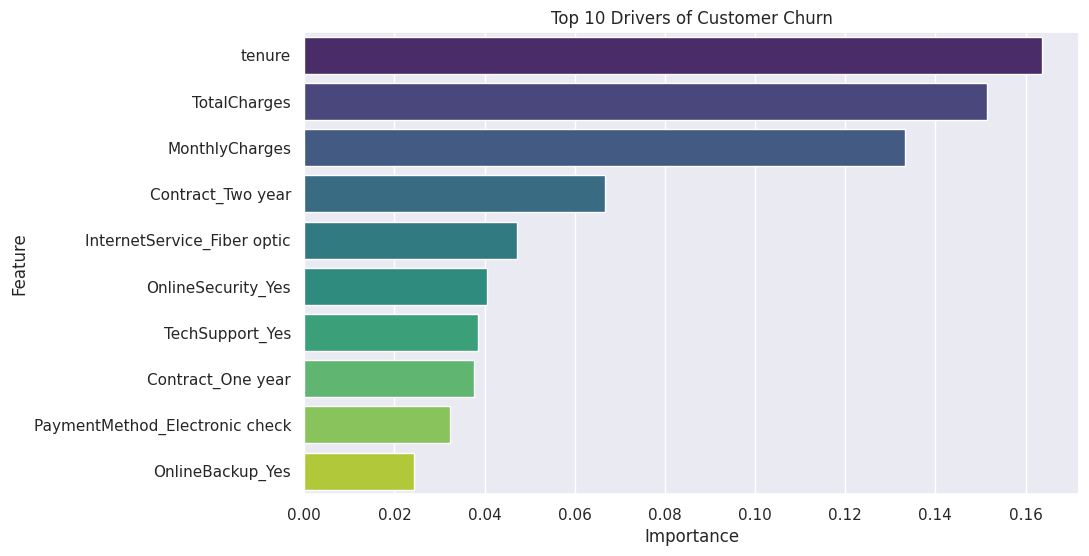

In [50]:
# Extract feature importance
importances = best_rf.feature_importances_
feature_names = x.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Top 10 Drivers of Customer Churn')
plt.show()

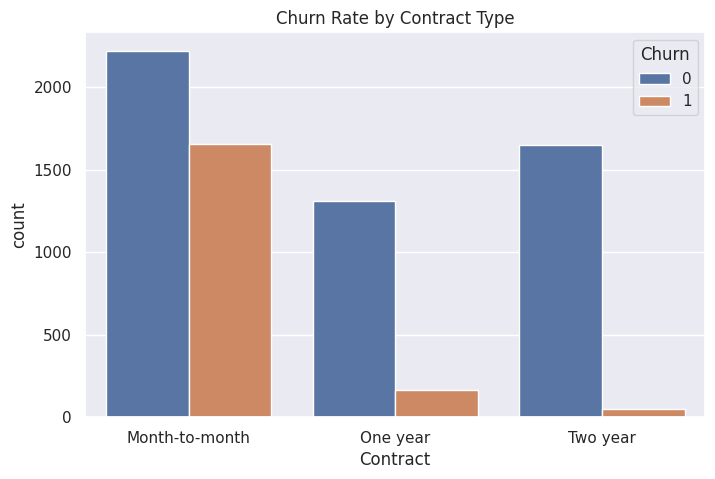

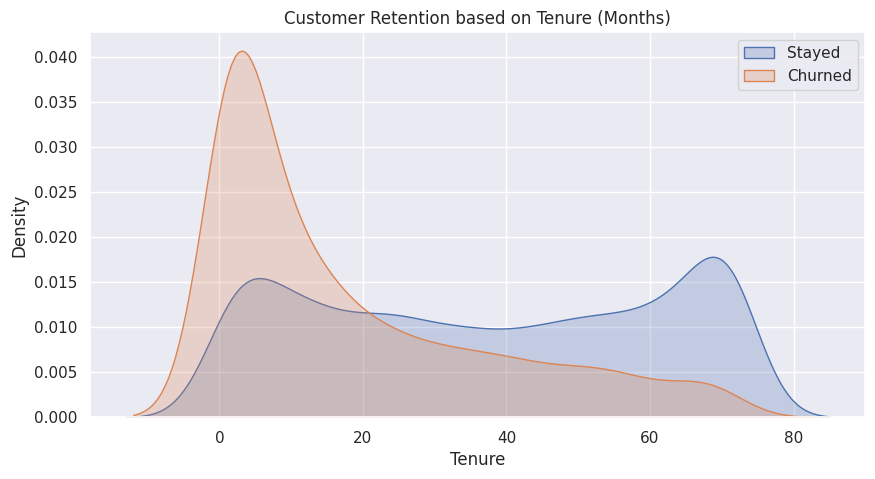

In [51]:
# 1. Churn by Contract Type
# The original 'Contract' column was converted to dummy variables during one-hot encoding.
# To plot the original categorical 'Contract' column, we need to load a fresh copy of the data
# or use the dataframe state before the one-hot encoding was applied.
# For this visualization, I'll load a temporary dataframe.
temp_churn_df = pd.read_csv('Telcom Data.csv')
# Also ensure the Churn column in the temporary dataframe is in the correct format for plotting
temp_churn_df['Churn'] = temp_churn_df['Churn'].replace({'Yes':1, 'No':0})

plt.figure(figsize=(8, 5))
sns.countplot(x='Contract', hue='Churn', data=temp_churn_df)
plt.title('Churn Rate by Contract Type')
plt.show()

# 2. Tenure vs Churn
plt.figure(figsize=(10, 5))
sns.kdeplot(customer_churn[customer_churn['Churn'] == 0]['tenure'], label='Stayed', shade=True)
sns.kdeplot(customer_churn[customer_churn['Churn'] == 1]['tenure'], label='Churned', shade=True)
plt.title('Customer Retention based on Tenure (Months)')
plt.xlabel('Tenure')
plt.legend()
plt.show()